# 作業:
[練習]請嘗試新增一層或兩層看看最後預測結果是否有差異
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))

# 資料預處理

In [1]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


In [2]:
#載入手寫辨識的資料集
from keras.datasets import mnist
(x_train_image,y_train_label),\
(x_test_image,y_test_label)= mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
#指定測試集與訓練資料集
x_Train =x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
x_Train_normalize = x_Train / 255
x_Test_normalize = x_Test / 255

In [5]:
#把LABEL轉成NUMERICAL Categorical 
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
#建立模型
model=Sequential()

In [8]:
#建構輸入層
model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

In [9]:
#建構隱藏層
model.add(Dense(units=128, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=64, input_dim=784, kernel_initializer='normal', activation='relu'))

In [10]:
#建構輸出層
model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))

In [11]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
None


# 訓練模型

In [12]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [13]:
train_history =model.fit(x=x_Train_normalize,
                         y=y_Train_OneHot,validation_split=0.2, 
                         epochs=10, batch_size=32,verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 12s 256us/step - loss: 0.2814 - acc: 0.9172 - val_loss: 0.1222 - val_acc: 0.9633
Epoch 2/10
48000/48000 [==============================] - 12s 242us/step - loss: 0.1068 - acc: 0.9674 - val_loss: 0.0932 - val_acc: 0.9701
Epoch 3/10
48000/48000 [==============================] - 11s 227us/step - loss: 0.0709 - acc: 0.9782 - val_loss: 0.0980 - val_acc: 0.9714
Epoch 4/10
48000/48000 [==============================] - 12s 245us/step - loss: 0.0538 - acc: 0.9829 - val_loss: 0.1251 - val_acc: 0.9666
Epoch 5/10
48000/48000 [==============================] - 11s 226us/step - loss: 0.0443 - acc: 0.9856 - val_loss: 0.0823 - val_acc: 0.9759
Epoch 6/10
48000/48000 [==============================] - 12s 242us/step - loss: 0.0352 - acc: 0.9885 - val_loss: 0.1127 - val_acc: 0.9701
Epoch 7/10
48000/48000 [==============================] - 14s 298us/step - loss: 0.0297 - acc: 0.9905 - val_loss: 0.

# 以圖形顯示訓練過程

In [14]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

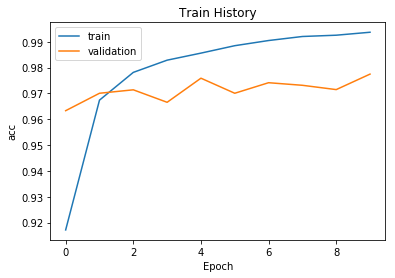

In [15]:
show_train_history(train_history,'acc','val_acc')

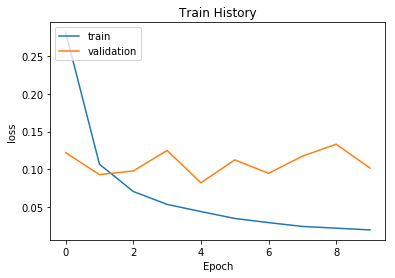

In [16]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [17]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 62us/step

accuracy= 0.9773


### 增加層數不依定會提升準確度，還需要調整每一層的神經元數量才行